In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dropout Rate

In [4]:
def RMSE(actual, predicted):
    """
    Calculate the Root Mean Square Error (RMSE) between actual and predicted values.
    
    Parameters:
    - actual (array-like): The true values.
    - predicted (array-like): The predicted values.
    
    Returns:
    - Root Mean Square Error (RMSE) value.
    """
    return round(np.sqrt(np.mean((actual - predicted)**2)),5)*100


In [69]:
results_MPT = pd.DataFrame()
Dropout = [0,0.05,0.01,0.15]
for drop in Dropout: 
    Path ='./Dropout/MTL_GARCH_{}.csv'.format(drop)
    data = pd.read_csv(Path, index_col='Date_Forecast', parse_dates=True)    

    # Calculate the RMSE for 'h4' for each year and store the results
    for year, group in data.groupby(data.index.year):
        rmse = RMSE(group['TrueSD'], group['h4'])
        results_MPT.at[drop, f'{year}'] = rmse 
results_MPT


,2007,2008,2009,2010,2011,2012,2013,2014,2015
0.00,3.160,3.460,2.279,2.580,1.995,2.256,2.229,2.353,1.922
0.05,2.918,3.730,2.124,2.155,2.100,1.708,1.814,1.818,1.749
0.01,1.242,3.841,2.226,2.353,2.020,2.147,2.145,2.177,1.735
0.15,2.603,4.201,1.686,1.765,1.955,1.812,1.768,1.281,1.317


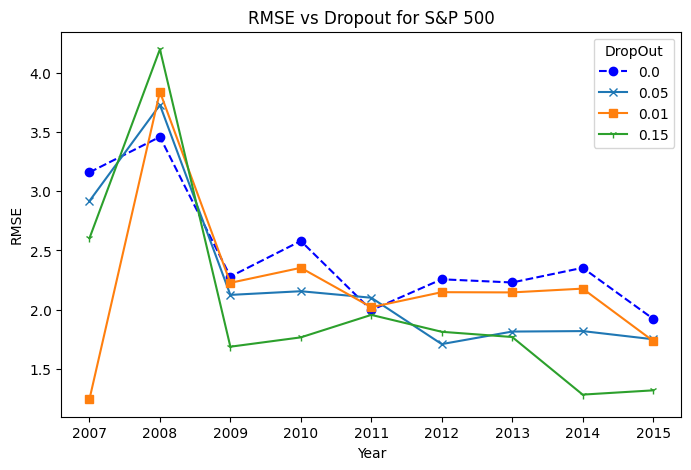

In [75]:
# create data 
x = results_MPT.columns
y0 = results_MPT.iloc[0,:]
y1 = results_MPT.iloc[1,:]
y2 = results_MPT.iloc[2,:]
y3 = results_MPT.iloc[3,:]
  
# plot lines
plt.figure(figsize=(8, 5))
plt.plot(x, y0,'--bo' ,label = "0.0") 
plt.plot(x, y1,'-x', label = "0.05") 
plt.plot(x, y2,'-s', label = "0.01") 
plt.plot(x, y3,'-1', label = "0.15")
plt.xlabel("Year")
plt.ylabel("RMSE")
plt.title("RMSE vs Dropout for S&P 500")
plt.legend(title="DropOut") 
plt.show()

In [17]:
results_MPT.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], dtype='object')

## Learning Rate

In [44]:
results_MPT = pd.DataFrame()
Dropout = [0.1, 0.01, 0.001, 0.0001]
for drop in Dropout: 
    Path ='./learning_rate/MTL_GARCH_{}.csv'.format(drop)
    data = pd.read_csv(Path, index_col='Date_Forecast', parse_dates=True)    

    # Calculate the RMSE for 'h4' for each year and store the results
    for year, group in data.groupby(data.index.year):
        rmse = RMSE(group['TrueSD'], group['h4'])
        results_MPT.at[drop, f'{year}'] = rmse 
results_MPT

,2007,2008,2009,2010,2011,2012,2013,2014,2015
0.1000,45.787,41.540,38.607,41.999,41.672,39.817,40.606,39.696,38.586
0.0100,2.918,3.730,2.124,2.155,2.100,1.708,1.814,1.818,1.749
0.0010,2.603,4.201,1.686,1.765,1.955,1.812,1.768,1.281,1.317
0.0001,3.160,3.460,2.279,2.580,1.995,2.256,2.229,2.353,1.922


In [45]:
results_MPT.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], dtype='object')

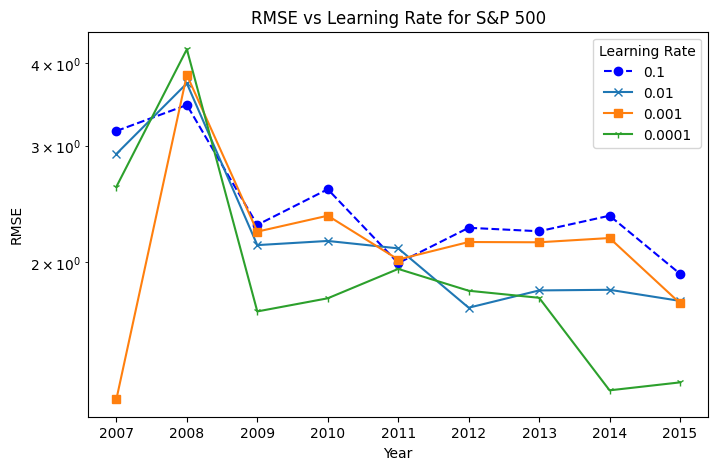

In [76]:
# create data 
x = results_MPT.columns
y0 = results_MPT.iloc[0,:]
y1 = results_MPT.iloc[1,:]
y2 = results_MPT.iloc[2,:]
y3 = results_MPT.iloc[3,:]
  
# plot lines
plt.figure(figsize=(8, 5))
plt.plot(x, y0,'--bo' ,label = "0.1") 
plt.plot(x, y1,'-x', label = "0.01") 
plt.plot(x, y2,'-s', label = "0.001") 
plt.plot(x, y3,'-1', label = "0.0001") 
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("RMSE")
plt.title("RMSE vs Learning Rate for S&P 500")
plt.legend(title="Learning Rate") 
plt.show()

In [28]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = results_MPT.columns
random_y0 = results_MPT.iloc[0,:]
random_y1 = results_MPT.iloc[1,:]
random_y2 = results_MPT.iloc[2,:]
random_y3 = results_MPT.iloc[3,:]

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    line = dict(color='royalblue', width=4, dash='dash'),
                    mode='lines+markers',
                    name='0.1'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1))# create data 
x = [1,2,3,4,5] 
y = [3,3,3,3,3] 
  
# plot lines 
plt.plot(x, y, label = "line 1") 
plt.plot(y, x, label = "line 2") 
plt.plot(x, np.sin(x), label = "curve 1") 
plt.plot(x, np.cos(x), label = "curve 2") 
plt.legend() 
plt.show(),
                    mode='lines+markers',
                    name='0.01'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines+markers',
                    name='0.001'))
fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines+markers',
                    name='0.0001'))
fig.update_yaxes(type="log")
fig.show()